<a href="https://colab.research.google.com/github/zuhurouf/ML-Foundation/blob/main/Supervised_ML_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Machine Learning?
> "Field of study that gives computers the ability to learn without being explitly programmed" - Arthur Samuel

### What is Supervised Learning?
**Supervised Learning** is a type of machine learning where the algorithms are trained by providing both the input `x` and the corresponding correct output `y` such that the algorithms can predict output for an unknown input data with atmost accuracy. There are two types of algorithms under supervised learning, those are:


1.   **Regression:** Predicting a number for a given input value
2.   **Classification:** Predicting the category/class of a given input



### What is Unsupervised Learning?
**Unsupervised Learning** is a type of machine learning where the algorithms are trained on data that has only the input `x` and doesn't have the correct output `y` to learn from. The objective of the algorithms will be to find structure or pattern in the given data. The different kinds of unsupervised learning are:


1.   **Clustering:** Grouping the input data into different clusters or groups
2.   **Anomaly detection:** Finding unusual data points in a given dataset
3.   **Dimensionality reduction:** Compressing a larger dataset to a smaller one without losing much information



## Linear Regression
A supervised regression algorithm which models a linear relationship between the input variables and the output variable. The linear relationship is defined as,</br>
$$
y => f_{w,b}(x) = wx + b
$$
where **f** is a function which takes in **x** (input feature) and based on the values of **w** and **b** obtained returns a prediction or an estimated value which is **y**

Here $f_{w,b}(x)$ is the mathematical modal of linear regression with one input variable. This function describes how the input variable is related to the output variable.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w, b = 5, 7

f_x = lambda x: (w * x) + b

x: [ 2  5  9 12]
y: [25 36 78 45]


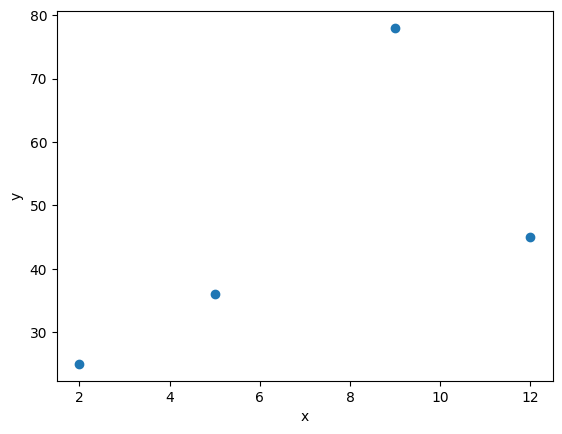

In [3]:
# Dummy data
x = np.array([2, 5, 9, 12])
y = np.array([25, 36, 78, 45])
data = {"x": x, "y": y}
print(f"x: {x}")
print(f"y: {y}")
plt.scatter(x = x, y = y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

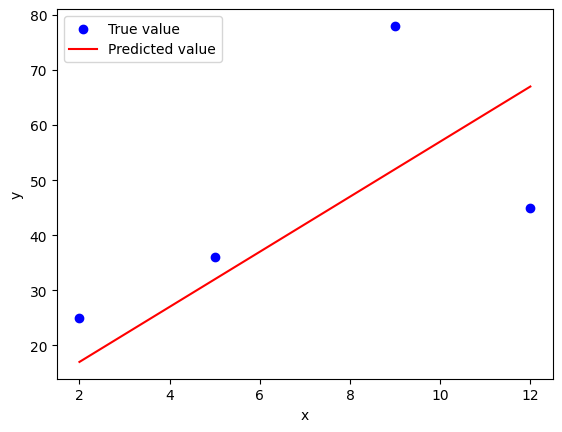

In [4]:
y_hat = [f_x(x_i) for x_i in x]
plt.scatter(x = x, y = y, label = "True value", color = "blue")
plt.plot(x, y_hat, c='red', label='Predicted value')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [5]:
print(f"For x = 7: {f_x(7)}")

For x = 7: 42


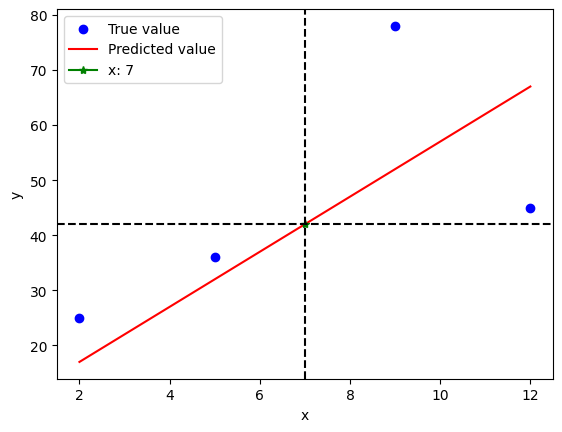

In [6]:
plt.scatter(x = x, y = y, label = "True value", color = "blue")
plt.plot(x, y_hat, c='red', label='Predicted value')
plt.plot(7, f_x(7), c = 'green', marker = "*", label = "x: 7")
plt.axvline(x = 7, color = 'black', linestyle = "--")
plt.axhline(y = f_x(7), color = 'black', linestyle = "--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Cost function
The first step in implementing an algorithm is to determine the type of cost function. **Cost function** tells how good the modal is predicting values with respect to the actual/expected output. The function takes in the modal's prediction ($\hat{y}$) and the true output ($y$) for the given input ($x$), compares the values and tells how well closely the modal has predicted value w.r.t. the actual output for a given modal parameters. The objective will be to find the best values for the parameters such that the value of the cost function is small. For linear regression, the cost function,
$$
J(w,b) = \frac{1}{2m}\sum_{i=1}^{m} (f_{w,b} - y)^2
$$
here, **w** and **b** are modal parameters, **m** is the number of training example in the dataset

In [7]:
def cost_func(y_hat, y) -> float:
  sum = 0
  for i in range(len(y)):
    sum += (y_hat[i] - y[i])**2
    return (1 / 2 * len(y)) * sum


In [8]:
def plot_cost_func(x, y, y_hat):
  plt.scatter(x = x, y = y, label = "True value", color = "blue")
  plt.plot(x, y_hat, c='red', label='Predicted value')
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()

In [9]:
print(f"w: {w}  b: {b}  J: {cost_func(y_hat = y_hat, y = y)}")

w: 5  b: 7  J: 128.0


w: 2  b: 3  J: 648.0


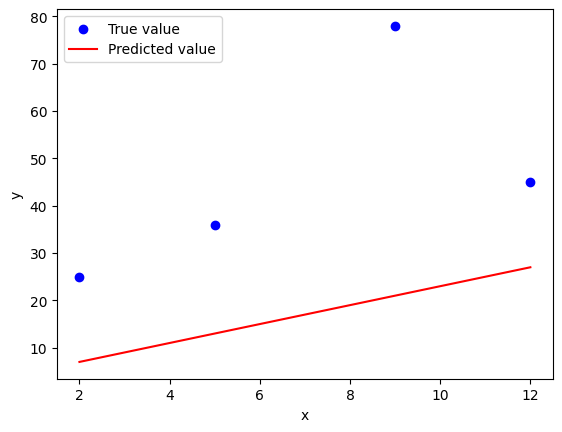

In [10]:
w, b = 2, 3
y_hat = f_x(x)
print(f"w: {w}  b: {b}  J: {cost_func(y_hat = y_hat, y = y)}")
plot_cost_func(x, y, y_hat)

w: 8  b: 11  J: 8.0


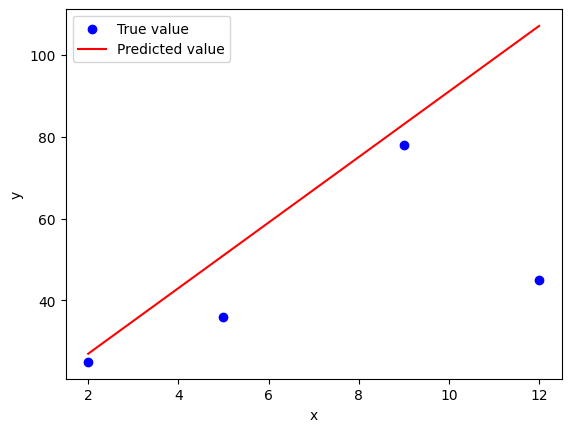

In [11]:
w, b = 8, 11
y_hat = f_x(x)
print(f"w: {w}  b: {b}  J: {cost_func(y_hat = y_hat, y = y)}")
plot_cost_func(x, y, y_hat)

w: 8  b: 9  J: 0.0


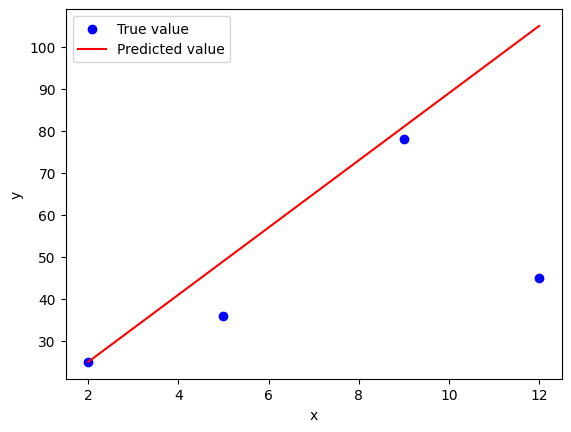

In [12]:
w, b = 8, 9
y_hat = f_x(x)
print(f"w: {w}  b: {b}  J: {cost_func(y_hat = y_hat, y = y)}")
plot_cost_func(x, y, y_hat)

## Gradient descent
A mathematical concept/algorithm to find the optimal values for the parameters of the modal such that for the given values the cost function is minimum (0 or near to 0). For a given cost function, there can be one minima or more than one which are called as local minima. The algorithm is as follows:


1.   Choose a random value for the parameters of a modal. For ex, w = 0, b = 0
2.   Update the values of the parameters using the following formula:
$$
P = p - α\frac{\partial J(p)}{\partial p}
$$
where **$α$** is the learning rate, **p** is the current value of parameter and **P** is the updated value.</br>
**Learning rate(α):** Tells the algorithm how big the next step should be. It is a positive value between 0 and 1.</br>
The partial derivative tells in which direction to move to find the minima.</br>
For $w$, $w = w - α\frac{\partial J(w)}{\partial w}$<br>
For $b$, $b = b - α\frac{\partial J(b)}{\partial b}$<br>





### Learning rate (α)
A value which tells the gradient descent algorithm how big the next step should be taken along the curve of cost functoin vs modal parameter. It is a positive value between 0 and 1. Choose an optimal value for the learning rate so that the algorithm finds the minima efficiently. If the value is too small, the modal takes a large time to find the minima while on the otherhand, a large learning rate may overshoot and doesn't find the minima ever.